In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

In [16]:
src = cv2.imread('./computer_vision/fig/fig/puppy.bmp')

M = np.array([[1,0.2,0],
             [0,1,0]], np.float32)

dst = cv2.warpAffine(src, M, (0,0))
# resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
dst_resize = cv2.resize(src, (0,0), None, fx =2, fy =1, 
                        interpolation = cv2.INTER_LINEAR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_resize', dst_resize)


cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
## 회전
src = cv2.imread('./computer_vision/fig/fig/puppy.bmp')

# rad = 30*np.pi/180
# M = np.array([[np.cos(rad),np.sin(rad),0],
#              [-np.sin(rad),np.cos(rad),0]], np.float32)

h,w = src.shape[:2]

cp = (w/2,h/2)
M = cv2.getRotationMatrix2D(cp, 30, 1)

dst = cv2.warpAffine(src, M, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
src = cv2.imread('./computer_vision/fig/green/checkerboard.png')

h,w = src.shape[:2]

src_point = np.array([[217,50],[691,47],[830,517],[67,526]],np.float32)

dst_point = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]],np.float32)

M = cv2.getPerspectiveTransform(src_point, dst_point)
dst = cv2.warpPerspective(src, M, (w,h))

cv2.imshow('src',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
## blur
src = cv2.imread('./computer_vision/fig/green/blue_eyes.png')

kernel_3 = np.ones((3,3), np.float32)/9.
kernel_5 = np.ones((5,5), np.float32)/25.


dst3 = cv2.filter2D(src, -1, kernel_3)
dst5 = cv2.filter2D(src, -1, kernel_5)
dst_mean = cv2.blur(src, (7,7))

dst_Gaussian = cv2.GaussianBlur(src, (0,0),5)

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src',src)
# cv2.imshow('dst3',dst3)
# cv2.imshow('dst5',dst5)
# cv2.imshow('dst_mean',dst_mean)
cv2.imshow('dst_Gaussian',dst_Gaussian)
cv2.imshow('dst_bilateral',dst_bilateral)




cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
## hist

src = cv2.imread('./computer_vision/fig/green/spring_in_park.jpg',
                cv2.IMREAD_REDUCED_COLOR_2)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

v_equal = cv2.equalizeHist(v)
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)

src_equal = cv2.merge((h,s,v_equal))
src_norm = cv2.merge((h,s,v_norm))

src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)
src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)

cv2.imshow('src',src)
cv2.imshow('src_equal',src_equal)
cv2.imshow('src_norm',src_norm)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('min', 'src')
    hmax = cv2.getTrackbarPos('max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin,150,0), (hmax,255,255))
    cv2.imshow('dst', dst)

src = cv2.imread('./computer_vision/fig/green/palette_round.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)



cv2.imshow('src',src)
cv2.createTrackbar('min','src', 50, 179, call_track)
cv2.createTrackbar('max','src', 80, 179, call_track)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


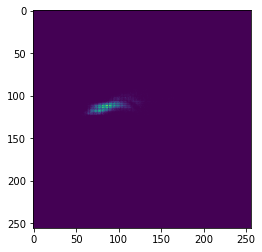

In [17]:
#backproj
src = cv2.imread('./computer_vision/fig/fig/green.png',
                cv2.IMREAD_REDUCED_COLOR_2)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)


x,y,w,h = cv2.selectROI(src)
crop = src_ycrcb[y:y+h, x: x+w]

channels = [1,2]
ranges = [0,256,0,256]

hist = cv2.calcHist([crop], channels, None, [256,256], ranges)


backproj = cv2.calcBackProject([src_ycrcb],channels, hist, ranges,1)
dst = cv2.copyTo(src, backproj)


cv2.imshow('src',src)
cv2.imshow('backproj',backproj)
cv2.imshow('dst',dst)

plt.imshow(hist)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')


out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    cv2.imshow('frame', frame)
    out.write(frame)
    
    if cv2.waitKey(30) == 27:
        break
        

cap.release()
out.release()
cv2.destroyAllWindows()

In [21]:
def call_mouse(event, x,y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x,y), (0,0,255), 3)
            cv2.imshow('image', img)
            oldx, oldy = x,y
            

img = np.ones((500,600,3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)


cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
img = cv2.imread('./computer_vision/fig/fig/puppy.bmp')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break
        
cv2.destroyAllWindows()

In [ ]:
------------------------------------------

In [39]:
# filename = './computer_vision/download/beagle/apple2.png'
filename = './computer_vision/download/images/beagle.jpg'

img = cv2.imread(filename)

if img is None:
    print('image read failed')
    sys.exit()
    
model = './computer_vision/download/bvlc_googlenet.caffemodel'
config = './computer_vision/download/deploy.prototxt'

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Network load failed')
    sys.exit()
    
classNames = []
with open('./computer_vision/download/classification_classes_ILSVRC2012.txt','r') as f:
    classNames = f.read().rstrip('\n').split('\n')

blob = cv2.dnn.blobFromImage(img, 1, (244,244), (104,117,123),
                            swapRB = False)    

net.setInput(blob)
prob = net.forward()
# print(prob)
out = prob.flatten()

classId = np.argmax(out)
confidence = out[classId]
category = classNames[classId]
text = f"{category}'\n'({confidence*100:4.2f} %)"
cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX,
           1, (0,0,255), 1, cv2.LINE_AA)


# print(classId)            # 948
# print(classNames[classId]) # 'Granny Smith'
# print(out[classId])         # 0.9995285


# print(classNames)
# print(classNames[0])

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
file_list = os.listdir('./computer_vision/download/images/')

files = []

for i in file_list:
    file_path = './computer_vision/download/images/' + i
    files.append(file_path)


model = './computer_vision/download/googlenet/bvlc_googlenet.caffemodel'
config = './computer_vision/download/googlenet/deploy.prototxt'

net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Network load failed')
    sys.exit()    
    

classNames = []
with open('./computer_vision/download/googlenet/classification_classes_ILSVRC2012.txt','r') as f:
    classNames = f.read().rstrip('\n').split('\n')
idx = 0
while True:
    file = files[idx]
    img = cv2.imread(file)
    
    blob = cv2.dnn.blobFromImage(img, 1, (244,244), (104,117,123),
                            swapRB = False)    

    net.setInput(blob)
    prob = net.forward()
    # print(prob)
    out = prob.flatten()

    classId = np.argmax(out)
    confidence = out[classId]
    category = classNames[classId]
    text = f"{category}({confidence*100:4.2f} %)"
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX,
               1, (0,0,255), 1, cv2.LINE_AA)


    cv2.imshow('img', img)
    
    if cv2.waitKey(300) == 27:
        break
    
    idx += 1
    
    if idx >= len(files):
        idx = 0
cv2.destroyAllWindows()

In [64]:
# 사진에서 얼굴 찾기
img = cv2.imread('./computer_vision/download/images/sunglass.png')

model = './computer_vision/download/facedetector/opencv_face_detector_uint8.pb'
config = './computer_vision/download/facedetector/opencv_face_detector.pbtxt'

# model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
# config = './computer_vision/download/facedetector/deploy.prototxt'


face_detect_net = cv2.dnn.readNet(model, config)

if face_detect_net.empty():
    print('net load error')
    sys.exit()

blob = cv2.dnn.blobFromImage(img, 1, (300,300), (104,177,123),
                            swapRB = False)

face_detect_net.setInput(blob)
out = face_detect_net.forward()
print(out.shape) 
detect = out[0,0, :,:]    #(1,1, 200,7)에서 행 200 열 7 2행 :얼굴일확률, x1,y1,x2,y2 -> 확률로 나옴
# print(detect.shape)       # 0~1행 버림 (200,7)

h,w = img.shape[:2]

for i in range(detect.shape[0]):   # 200
    confidence = detect[i,2]
    
    if confidence > 0.5:
        x1 = int(detect[i,3]*w)
        y1 = int(detect[i,4]*h)
        x2 = int(detect[i,5]*w)
        y2 = int(detect[i,6]*h)
        
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 2)
        text = 'Face : {}%'.format(round(confidence*100, 2))
        cv2.putText(img, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
                   0.8, (0,0,255), 1, cv2.LINE_AA)
        

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

(1, 1, 200, 7)


In [65]:
# 영상에서 얼굴 찾기
model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123))
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
        
        
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
            text = 'Face : {}%'.format(round(confidence*100, 2))
            
            cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
                        0.8, (0,0,255), 1, cv2.LINE_AA)
        
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(30) == 27:
        break
        
        
cap.release()
cv2.destroyAllWindows()

In [2]:
from tensorflow import keras

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# print(x_train.shape)
# print(x_train.shape)
# print(x_test.shape)

x_train = x_train.reshape(60000, 28, 28, 1)/255.
x_test = x_test.reshape(10000, 28, 28, 1)/255.

# print(x_train.dtype)
# print(x_test.dtype)

# y_train = keras.utils.to_categorical(y_train)
# y_train
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1),
                             activation = 'relu'))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))
          
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam', 
              metrics = 'accuracy')

In [22]:
modelpath = './computer_vision/mnist_mymodel/{epoch:002d}-{val_loss:.4f}.h5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                       save_best_only = True)

early_stopping = keras.callbacks.EarlyStopping(patience = 10)

history = model.fit(x_train, y_train, epochs = 10, batch_size = 200,
                   verbose = 1, validation_split = 0.3,
                   callbacks = [checkpoint, early_stopping])


Epoch 1/10
210/210 [==============================] - 52s 245ms/step - loss: 0.2689 - accuracy: 0.9183 - val_loss: 0.0819 - val_accuracy: 0.9758
Epoch 2/10
210/210 [==============================] - 48s 226ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.0578 - val_accuracy: 0.9832
Epoch 3/10
210/210 [==============================] - 50s 236ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 4/10
210/210 [==============================] - 48s 226ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0497 - val_accuracy: 0.9856
Epoch 5/10
210/210 [==============================] - 48s 230ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0481 - val_accuracy: 0.9878
Epoch 6/10
210/210 [==============================] - 48s 229ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0490 - val_accuracy: 0.9868
Epoch 7/10
210/210 [==============================] - 50s 238ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0522 - val_ac

In [23]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 13ms/step - loss: 0.0367 - accuracy: 0.9908
[0.036735013127326965, 0.9908000230789185]


In [34]:
model.save('./mnist_onnx/', include_optimizer=False)

INFO:tensorflow:Assets written to: ./mnist_onnx/assets


In [25]:
! pip install -U tf2onnx

  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [39]:
!python -m tf2onnx.convert --saved-model mnist_onnx --output model_mnist.onnx

2022-05-04 16:05:45.223858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-04 16:05:45.223890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
C:\Users\mini\anaconda3\lib\runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-05-04 16:05:48.500197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-05-04 16:05:48.500216: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-04 16:05:48.503714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic informati

In [16]:
def on_mouse(event, x, y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x,y), 255, 15, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y

def norm_digit(img):
    # 무게 중심 좌표 추출
    m = cv2.moments(img)
    cx = m['m10'] / m['m00']
    cy = m['m01'] / m['m00']
    h, w = img.shape[:2]
    
    # affine 행렬 생성
    aff = np.array([[1, 0, w/2 - (cx + 0.5)], [0, 1, h/2 - (cy + 0.5)]], 
                   dtype=np.float32)
    
    # warpAffine을 이용해 기하학 변환
    dst = cv2.warpAffine(img, aff, (0, 0))
    return dst
            
                        
net = cv2.dnn.readNet('./model_mnist.onnx')

if net.empty():
    print('Net load failed')
    sys.exit()
    
img = np.zeros((400,400), np.uint8)
cv2.imshow('image', img)
cv2.setMouseCallback('image', on_mouse)

while True:
    key = cv2.waitKey()
    
    if key == 27:
        break
        
    elif key == ord(' '):
        blob= cv2.dnn.blobFromImage(norm_digit(img), 1/255., (28,28))
        net.setInput(blob)
        prob = net.forward()
        
        _, maxVal, _, maxLoc = cv2.minMaxLoc(prob)
        digit = maxLoc[0]
        
        print(f'{digit} ({maxVal*100:4.2f}%)')
        img.fill(0)
        
        cv2.imshow('image', img)
        
        
        
cv2.destroyAllWindows()

1 (99.63%)
2 (99.96%)
3 (99.99%)
4 (100.00%)
3 (90.36%)
5 (99.29%)
6 (99.29%)
7 (100.00%)
8 (100.00%)
9 (99.71%)
0 (80.03%)
0 (99.97%)


In [13]:
cv2.minMaxLoc(prob)

(3.063014685639187e-12, 0.99993896484375, (0, 0), (4, 0))